In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## Вариант 2

#### 1. Опишите теоретическую модель случайного леса.

Случайный лес - ансамбль из решающих деревьев.

"Случайными" леса называны из-за того, что в процесс построения деревьев, из которых они состоят, внесен элемент случайности для обеспечения уникальности каждого из деревьев. Случайность заключается в обучении базовых алгоритмов на разных подвыборках обучающей выборки.

Один из способов построения случайных подвыборок - _бутстрап (bootstrap)_. Этот метод заключается в получении из выборки длины $l$ нескольких разных выборок той же длины $l$ за счёт копирования элементов. Для получения бутстрап-выборки из исходной выборки $l$ раз выбирается случайный элемент, причем каждый раз новый элемент выбирается из всей выборки.

Например, если у нас есть исходная выборка вида [a, b, c, d, e], возможными бутстрап-выборками могут быть [a, b, a, c, b] или [b, e, e, d, b] и т.д.

В случае задачи регрессии при использовании композиции из базовых алгоритмов ответом будет считаться среднее значение ответа каждого алгоритма

В задачах классификации, соответственно, знак полученного усредненного ответа или (что аналогично) класс определяется путем голосования: объект относится к классу, за который "проголосовало" наибольшее число базовых алгоритмов.


#### 2. Напишите следующий год: сгенерируйте данные в виде набора точек по нескольким кластерам; выполните кластеризацию; визуализируйте результат.

In [55]:
number_of_centers = 5
Blobs, y = make_blobs(centers = number_of_centers, n_samples = 150, random_state = 23, cluster_std = 0.7)

print(y)

[0 1 1 4 4 0 3 2 4 0 2 2 3 0 3 0 3 2 3 1 0 3 4 3 0 1 4 1 2 4 0 3 2 1 3 1 0
 2 0 0 1 1 3 2 2 0 4 2 2 0 1 4 2 2 0 3 3 4 3 0 1 4 3 2 0 3 2 2 1 1 0 2 3 0
 3 3 0 3 3 2 4 2 3 0 4 1 0 2 4 0 0 3 4 3 4 3 1 4 2 4 1 1 2 4 2 4 2 3 0 1 4
 2 4 1 2 2 4 4 1 3 1 0 1 4 4 1 2 2 0 3 0 3 1 0 1 1 3 1 4 4 4 1 1 4 2 1 0 0
 4 3]


In [56]:
model = KMeans(number_of_centers)
model.fit(Blobs)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


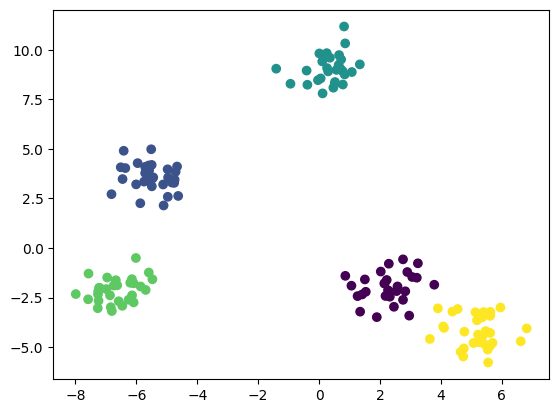

In [57]:
plt.scatter(Blobs[:,0],Blobs[:,1], c = model.labels_);

[[ 2.27074341 -1.99649858]
 [-5.5068373   3.56800825]
 [ 0.33229014  9.07077237]
 [-6.65664816 -2.12434393]
 [ 5.16826844 -4.2040842 ]]


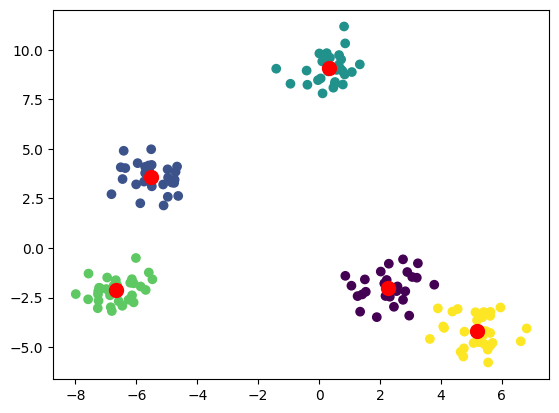

In [58]:
print(model.cluster_centers_)
plt.scatter(Blobs[:, 0], Blobs[:, 1], c = model.labels_);
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, color = "red");

#### 3. Опишите метрику для проверки качества алгоритмов регрессии.


Mean absolute error, средняя абсолютная ошибка - измеряет среднее абсолютное отклонение предсказанных значений от фактических. Менее чувствительна к выбросам, чем MSE

$$
MAE = \frac{1}{n}\sum_{i=1}^{n}\left|y_i - \hat{y}_i\right|
$$

Mean Squared Error, MSE или среднеквадратическим отклонением - измеряет среднее значение квадратов ошибок. Более чувствительна к выбросам.

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

Корень из среднеквадратичной ошибки - является квадратным корнем из MSE и возвращает ошибку в тех же единицах, что и целевая переменная. Это делает интерпретацию более удобной.

$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$